# Recognising Handwritten digits on MNIST dataset using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist_train.csv')
print(df.shape)

(60000, 785)


In [3]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(60000, 784) (60000,)


In [7]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


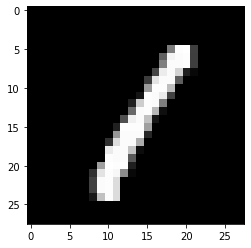

1


In [9]:
#Visualize some samples

def drawimg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawimg(X_train[3])
print(Y_train[3])

In [8]:
#Applying KNN to this data

In [10]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,querypoint,k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(querypoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    #nearest/first k points
    vals = vals[:k]
    vals = np.array(vals)
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

# Make Predictions

In [11]:
pred = knn(X_train, Y_train,X_test[0])

print(int(pred))

(array([4.]), array([5], dtype=int64))
4


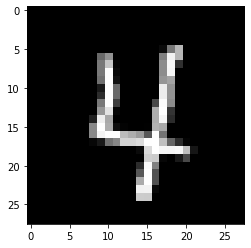

4


In [12]:
drawimg(X_test[0])
print(Y_test[0])